Let's break down the abstract of BART (Bidirectional and Auto-Regressive Transformers) in simpler terms and with an example:

### 1. **Architecture:**
   - BART uses a **Seq2Seq (Sequence-to-Sequence)** architecture, which is common in tasks like machine translation (e.g., translating a sentence from one language to another).
   - **Bidirectional Encoder (like BERT)**: The encoder reads the input text (sequence) both forwards and backwards, allowing it to understand the context of a word from both directions.
   - **Left-to-Right Decoder (like GPT)**: The decoder generates the output text (sequence) by predicting one word at a time, from left to right, using the information provided by the encoder.

   **Example**: 
   - For summarizing a dialogue:
     - The **encoder** takes in the full dialogue, understanding all the words in both directions.
     - The **decoder** generates the summary step by step, predicting one word at a time.

   Suppose the dialogue is:
   ```
   Person 1: Hello, how are you?
   Person 2: I'm good, thank you! And you?
   ```
   BART could summarize this as: 
   ```
   A conversation about well-being.
   ```

### 2. **Pretraining Tasks:**
   - **Shuffling Sentence Order**: During pretraining, BART learns to reorganize jumbled sentences into their correct order.
     - Example: If the original text is "I went to the store. Then I went home.", BART might see "Then I went home. I went to the store." and must figure out the correct sequence.
   
   - **In-filling Scheme**: Instead of masking single words like BERT, BART replaces spans (several words) of text with a single mask token and learns to fill in the missing span.
     - Example: In the sentence, "I went to the [MASK] and bought some apples," BART must predict that "[MASK]" is "store."

### 3. **Fine-Tuning for Text Generation:**
   - BART is especially powerful when fine-tuned for **text generation tasks** like dialogue summarization, question answering, and abstract text generation.
   - Fine-tuning involves training the pre-trained BART model on a specific dataset for the task you care about.

   **Example**:
   Suppose you're fine-tuning BART to summarize news articles. After fine-tuning, you might give it an article, and it generates a summary:
   - Input Article: "The company has been doing well this year, reporting a 10% increase in sales."
   - BART Summary: "The company saw a 10% sales growth this year."

### 4. **Comprehension Tasks:**
   - BART also performs well on **comprehension tasks**, which require understanding the meaning of text and answering questions about it.
   - It performs at the same level as **RoBERTa** on tasks like **GLUE** (General Language Understanding Evaluation) and **SQuAD** (Stanford Question Answering Dataset).

   **Example**:
   In a question-answering task, given the passage:
   - Passage: "Albert Einstein developed the theory of relativity."
   - Question: "Who developed the theory of relativity?"
   - BART’s answer: "Albert Einstein."

### 5. **State-of-the-Art Results:**
   - BART achieves **new state-of-the-art results** on many tasks, including abstractive dialogue generation, summarization, and question answering. It improved performance on these tasks, measured by **ROUGE** scores (a metric for evaluating the quality of text summaries).
   - BART’s improvements on these tasks can be as much as 6 points on the ROUGE score.

   **Example**: If other models achieve a ROUGE score of 25 on a summarization task, BART might achieve a score of 31, indicating a better summary.

### In Summary:
- **BART's Architecture** combines a **bidirectional encoder** (understanding context in both directions) and a **left-to-right decoder** (generating sequences one word at a time).
- **Pretraining** involves two key tasks: **shuffling sentence order** and **in-filling** spans of text with a mask, which makes it more robust for a variety of tasks.
- **Fine-tuning** BART makes it highly effective for tasks like text generation, question answering, and summarization, where it generates or understands text based on context.
- BART performs at the same level as **RoBERTa** on comprehension tasks and surpasses other models on summarization tasks with improvements measured by **ROUGE scores**.

This makes BART a versatile and powerful model for many NLP applications.

In [10]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable


In [12]:
!pip install evaluate

Defaulting to user installation because normal site-packages is not writeable


In [13]:
!pip install rouge-score

Defaulting to user installation because normal site-packages is not writeable


In [14]:
!pip install py7zr

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [16]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [17]:
# Data Handling
import pandas as pd  # For data manipulation and analysis, particularly with DataFrames.
import numpy as np  # For numerical computations and handling arrays.
from datasets import Dataset, load_metric  # For handling datasets and evaluation metrics, often used in machine learning.

# Data Visualization
import plotly.express as px  # For creating simple and interactive visualizations quickly.
import plotly.graph_objs as go  # For creating more complex visualizations with lower-level control.
import plotly.subplots as sp  # For creating subplot grids and complex layouts.
from plotly.subplots import make_subplots  # For creating subplots within a figure.
import plotly.figure_factory as ff  # For creating specialized visualizations like scatter plots and heatmaps.
import plotly.io as pio  # For managing the default plotly output and rendering settings.
from IPython.display import display  # For displaying output within Jupyter notebooks.
from plotly.offline import init_notebook_mode  # For enabling offline mode in Jupyter notebooks.
init_notebook_mode(connected=True)  # Initialize Plotly to run in offline mode.

# Statistics & Mathematics
import scipy.stats as stats  # For statistical functions, distributions, and tests.
import statsmodels.api as sm  # For statistical modeling and hypothesis testing.
from scipy.stats import shapiro, skew, anderson, kstest, gaussian_kde, spearmanr  # For specific statistical tests and functions:
    # shapiro: Shapiro-Wilk test for normality.
    # skew: Measure of skewness in a data distribution.
    # anderson: Anderson-Darling test for normality.
    # kstest: Kolmogorov-Smirnov test for goodness of fit.
    # gaussian_kde: Gaussian Kernel Density Estimation.
    # spearmanr: Spearman's rank correlation coefficient.
import math  # For mathematical functions and constants.

# Hiding warnings
import warnings  # For managing and suppressing warning messages.
warnings.filterwarnings("ignore")  # Suppress all warning messages.

In [18]:
!pip install torch


Defaulting to user installation because normal site-packages is not writeable


In [19]:
!pip3 install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable


In [20]:
# Transformers
from transformers import BartTokenizer, BartForConditionalGeneration      # BERT Tokenizer and architecture
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments         # These will help us to fine-tune our model
from transformers import pipeline                                         # Pipeline
from transformers import DataCollatorForSeq2Seq                           # DataCollator to batch the data                                                          # PyTorch
import evaluate # Hugging Face's library for model evaluation
import torch

# Other NLP libraries
from textblob import TextBlob                                             # This is going to help us fix spelling mistakes in texts
from sklearn.feature_extraction.text import TfidfVectorizer               # This is going to helps identify the most common terms in the corpus
import re                                                                 # This library allows us to clean text data
import nltk                                                               # Natural Language Toolkit
nltk.download('punkt')    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adrit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Configuring Pandas to exhibit larger columns
'''
This is going to allow us to fully read the dialogues and their summary 
'''
pd.set_option('display.max_colwidth', 1000)

In [22]:
# Configuring notebook
seed = 42
#paper_color =
#bg_color =
colormap = 'cividis'
template = 'plotly_dark'

In [23]:
def display_feature_list(features, feature_type):

    '''
    This function displays the features within each list for each type of data
    '''

    print(f"\n{feature_type} Features: ")
    print(', '.join(features) if features else 'None')

def describe_df(df):
    """
    This function prints some basic info on the dataset and
    sets global variables for feature lists.
    """

    global categorical_features, continuous_features, binary_features
    categorical_features = [col for col in df.columns if df[col].dtype == 'object']
    binary_features = [col for col in df.columns if df[col].nunique() <= 2 and df[col].dtype != 'object']
    continuous_features = [col for col in df.columns if df[col].dtype != 'object' and col not in binary_features]

    print(f"\n{type(df).__name__} shape: {df.shape}")
    print(f"\n{df.shape[0]:,.0f} samples")
    print(f"\n{df.shape[1]:,.0f} attributes")
    print(f'\nMissing Data: \n{df.isnull().sum()}')
    print(f'\nDuplicates: {df.duplicated().sum()}')
    print(f'\nData Types: \n{df.dtypes}')

    #negative_valued_features = [col for col in df.columns if (df[col] < 0).any()]
    #print(f'\nFeatures with Negative Values: {", ".join(negative_valued_features) if negative_valued_features else "None"}')

    display_feature_list(categorical_features, 'Categorical')
    display_feature_list(continuous_features, 'Continuous')
    display_feature_list(binary_features, 'Binary')

    print(f'\n{type(df).__name__} Head: \n')
    display(df.head(5))
    print(f'\n{type(df).__name__} Tail: \n')
    display(df.tail(5))

In [24]:
def histogram_boxplot(df,hist_color, box_color, height, width, legend, name):
    '''
    This function plots a Histogram and a Box Plot side by side

    Parameters:
    hist_color = The color of the histogram
    box_color = The color of the boxplots
    heigh and width = Image size
    legend = Either to display legend or not
    '''

    features = df.select_dtypes(include = [np.number]).columns.tolist()

    for feat in features:
        try:
            fig = make_subplots(
                rows=1,
                cols=2,
                subplot_titles=["Box Plot", "Histogram"],
                horizontal_spacing=0.2
            )

            density = gaussian_kde(df[feat])
            x_vals = np.linspace(min(df[feat]), max(df[feat]), 200)
            density_vals = density(x_vals)

            fig.add_trace(go.Scatter(x=x_vals, y = density_vals, mode = 'lines',
                                     fill = 'tozeroy', name="Density", line_color=hist_color), row=1, col=2)
            fig.add_trace(go.Box(y=df[feat], name="Box Plot", boxmean=True, line_color=box_color), row=1, col=1)

            fig.update_layout(title={'text': f'<b>{name} Word Count<br><sup><i>&nbsp;&nbsp;&nbsp;&nbsp;{feat}</i></sup></b>',
                                     'x': .025, 'xanchor': 'left'},
                             margin=dict(t=100),
                             showlegend=legend,
                             template = template,
                             #plot_bgcolor=bg_color,paper_bgcolor=paper_color,
                             height=height, width=width
                            )

            fig.update_yaxes(title_text=f"<b>Words</b>", row=1, col=1, showgrid=False)
            fig.update_xaxes(title_text="", row=1, col=1, showgrid=False)

            fig.update_yaxes(title_text="<b>Frequency</b>", row=1, col=2,showgrid=False)
            fig.update_xaxes(title_text=f"<b>Words</b>", row=1, col=2, showgrid=False)

            fig.show()
            print('\n')
        except Exception as e:
            print(f"An error occurred: {e}")

In [25]:
def plot_correlation(df, title, subtitle, height, width, font_size):
    '''
    This function is resposible to plot a correlation map among features in the dataset.

    Parameters:
    height = Define height
    width = Define width
    font_size = Define the font size for the annotations
    '''
    corr = np.round(df.corr(numeric_only = True), 2)
    mask = np.triu(np.ones_like(corr, dtype = bool))
    c_mask = np.where(~mask, corr, 100)

    c = []
    for i in c_mask.tolist()[1:]:
        c.append([x for x in i if x != 100])



    fig = ff.create_annotated_heatmap(z=c[::-1],
                                      x=corr.index.tolist()[:-1],
                                      y=corr.columns.tolist()[1:][::-1],
                                      colorscale = colormap)

    fig.update_layout(title = {'text': f"<b>{title} Heatmap<br><sup>&nbsp;&nbsp;&nbsp;&nbsp;<i>{subtitle}</i></sup></b>",
                                'x': .025, 'xanchor': 'left', 'y': .95},
                    margin = dict(t=210, l = 110),
                    yaxis = dict(autorange = 'reversed', showgrid = False),
                    xaxis = dict(showgrid = False),
                    template = template,
                    #plot_bgcolor=bg_color,paper_bgcolor=paper_color,
                    height = height, width = width)


    fig.add_trace(go.Heatmap(z = c[::-1],
                             colorscale = colormap,
                             showscale = True,
                             visible = False))
    fig.data[1].visible = True

    for i in range(len(fig.layout.annotations)):
        fig.layout.annotations[i].font.size = font_size

    fig.show()

### Defining tf-idf (term frequency-inverse document frequency

In [26]:
def compute_tfidf(df_column, ngram_range=(1,1), max_features=15):
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english', ngram_range=ngram_range)
    x = vectorizer.fit_transform(df_column.fillna(''))
    df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
    return df_tfidfvect

In [27]:
train = pd.read_csv(r"C:\Users\adrit\OneDrive\Desktop\jupyter\BART\samsum-train.csv")
test = pd.read_csv(r"C:\Users\adrit\OneDrive\Desktop\jupyter\BART\samsum-test.csv")
val = pd.read_csv(r"C:\Users\adrit\OneDrive\Desktop\jupyter\BART\samsum-validation.csv")

In [28]:
describe_df(train)


DataFrame shape: (14732, 3)

14,732 samples

3 attributes

Missing Data: 
id          0
dialogue    1
summary     0
dtype: int64

Duplicates: 0

Data Types: 
id          object
dialogue    object
summary     object
dtype: object

Categorical Features: 
id, dialogue, summary

Continuous Features: 
None

Binary Features: 
None

DataFrame Head: 



,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-),Amanda baked cookies and will bring Jerry some tomorrow.
1,13728867,Olivia: Who are you voting for in this election? \r\nOliver: Liberals as always.\r\nOlivia: Me too!!\r\nOliver: Great,Olivia and Olivier are voting for liberals in this election.
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I was going to do lots of stuff but ended up procrastinating\r\nTim: What did you plan on doing?\r\nKim: Oh you know, uni stuff and unfucking my room\r\nKim: Maybe tomorrow I'll move my ass and do everything\r\nKim: We were going to defrost a fridge so instead of shopping I'll eat some defrosted veggies\r\nTim: For doing stuff I recommend Pomodoro technique where u use breaks for doing chores\r\nTim: It really helps\r\nKim: thanks, maybe I'll do that\r\nTim: I also like using post-its in kaban style",Kim may try the pomodoro technique recommended by Tim to get more stuff done.
3,13730747,"Edward: Rachel, I think I'm in ove with Bella..\r\nrachel: Dont say anything else..\r\nEdward: What do you mean??\r\nrachel: Open your fu**ing door.. I'm outside",Edward thinks he is in love with Bella. Rachel wants Edward to open his door. Rachel is outside.
4,13728094,"Sam: hey overheard rick say something\r\nSam: i don't know what to do :-/\r\nNaomi: what did he say??\r\nSam: he was talking on the phone with someone\r\nSam: i don't know who\r\nSam: and he was telling them that he wasn't very happy here\r\nNaomi: damn!!!\r\nSam: he was saying he doesn't like being my roommate\r\nNaomi: wow, how do you feel about it?\r\nSam: i thought i was a good rommate\r\nSam: and that we have a nice place\r\nNaomi: that's true man!!!\r\nNaomi: i used to love living with you before i moved in with me boyfriend\r\nNaomi: i don't know why he's saying that\r\nSam: what should i do???\r\nNaomi: honestly if it's bothering you that much you should talk to him\r\nNaomi: see what's going on\r\nSam: i don't want to get in any kind of confrontation though\r\nSam: maybe i'll just let it go\r\nSam: and see how it goes in the future\r\nNaomi: it's your choice sam\r\nNaomi: if i were you i would just talk to him and clear the air","Sam is confused, because he overheard Rick complaining about him as a roommate. Naomi thinks Sam should talk to Rick. Sam is not sure what to do."



DataFrame Tail: 



,id,dialogue,summary
14727,13863028,"Romeo: You are on my ‘People you may know’ list.\nGreta: Ah, maybe it is because of the changed number of somebody’s?\nGreta: I don’t know you?\nRomeo: This might be the beginning of a beautiful relationship\nRomeo: How about adding me on your friend list and talk a bit?\nGreta: No.\nRomeo: Okay I see.",Romeo is trying to get Greta to add him to her friend list but she refuses.
14728,13828570,"Theresa: <file_photo>\r\nTheresa: <file_photo>\r\nTheresa: Hey Louise, how are u?\r\nTheresa: This is my workplace, they always give us so much food here 😊\r\nTheresa: Luckily they also offer us yoga classes, so all the food isn't much of a problem 😂\r\nLouise: Hey!! 🙂 \r\nLouise: Wow, that's awesome, seems great 😎 Haha\r\nLouise: I'm good! Are you coming to visit Stockholm this summer? 🙂\r\nTheresa: I don't think so :/ I need to prepare for Uni.. I will probably attend a few lessons this winter\r\nLouise: Nice! Do you already know which classes you will attend?\r\nTheresa: Yes, it will be psychology :) I want to complete a few modules that I missed :)\r\nLouise: Very good! Is it at the Uni in Prague?\r\nTheresa: No, it will be in my home town :)\r\nLouise: I have so much work right now, but I will continue to work until the end of summer, then I'm also back to Uni, on the 26th September!\r\nTheresa: You must send me some pictures, so I can see where you live :) \r\nLouise: I will,...","Theresa is at work. She gets free food and free yoga classes. Theresa won't go to visit Louise in Stockholm, because she will prepare for university psychology lessons. She'll be back at uni on 26th September."
14729,13819050,"John: Every day some bad news. Japan will hunt whales again\r\nErica: Yes, I've read this. It's very upsetting\r\nJohn: Cruel Japanese\r\nFaith: I think this is a racist remark. Because Island and Norways has never joined this international whaling agreement\r\nErica: really? I haven't known, everybody is so outraged by Japan\r\nFaith: sure, European hypocrisy \r\nJohn: not entirely. Scandinavians don't use the nets that Japanese use, so Norway and Island kill much less specimens that Japan will\r\nFaith: oh, it's much more complex than one may expect\r\nJohn: True, but the truth is, that all of them should stop\r\nJohn: and this decision is a step back\r\nFaith: yes, this is worrying\r\nErica: And it seems that the most important whaling countries are out of the agreement right now\r\nFaith: yes, seems so\r\nJohn: Just like USA leaving the Paris Agreement",Japan is going to hunt whales again. Island and Norway never stopped hunting them. The Scandinavians kill fewer whales than the Japanese.
14730,13828395,"Jennifer: Dear Celia! How are you doing?\r\nJennifer: The afternoon with the Collins was very pleasant, nice folks, but we missed you.\r\nJennifer: But I appreciate your consideration for Peter.\r\nCelia: My dear Jenny! It turns out that my decision not to come, though I wanted so much to see you again and Peter and the Collins, was right. Yesterday it all developed into a full bore cold. Sh.....\r\nCelia: All symptoms like in a text book.\r\nCelia: Luckily it's contagious only on the first 2, 3 days, so when we meet next week it should be alright.\r\nCelia: Thanks for asking! Somehow for all of us Peter comes first now.\r\nJennifer: That's too bad. Poor you...\r\nJennifer: I'll be driving to FR, do you want me to bring you sth? It's on my way.\r\nCelia: Thank you dear! I was at the pharmacy yesterday and had done my shopping the day before.\r\nCelia: You'd better still stay away from me in case I'm still contagious\r\nJennifer: Right. So I'll only leave a basket on your terrace. A...","Celia couldn't make it to the afternoon with the Collins and Jennifer as she is ill. She's working, but doesn't want to meet with Jennifer as it might be contagious. Jennifer will leave a basket with cookies on Celia's terrace."
14731,13729017,"Georgia: are you ready for hotel hunting? We need to book somethin

In [29]:
mask = train['dialogue'].isnull() # Creating mask with null dialogues
filtered_train = train[mask] # filtering dataframe
filtered_train # Visualizing

,id,dialogue,summary
6054,13828807,NaN,problem with visualization of the content


In [30]:
train = train.dropna() # removing null values

In [31]:
# Removing 'Id' from categorical features list
categorical_features.remove('id')

In [32]:
df_text_lenght = pd.DataFrame() # Creating an empty dataframe
for feat in categorical_features: # Iterating through features --> Dialogue & Summary
    df_text_lenght[feat] = train[feat].apply(lambda x: len(str(x).split())) #  Counting words for each feature

# Plotting histogram-boxplot
histogram_boxplot(df_text_lenght,'#89c2e0', '#d500ff', 600, 1000, True, 'Train Dataset')


### 1. **TF-IDF (Term Frequency-Inverse Document Frequency)**
   - **Term Frequency (TF)**: The number of times a term (word) appears in a document (e.g., dialogue or summary) divided by the total number of words in that document. This gives a measure of how frequent a word is in a particular document.
   - **Inverse Document Frequency (IDF)**: This gives a measure of how common or rare a term is across all documents in the corpus. If a word appears in many documents, its IDF is low, while rare words have higher IDF values.

   **Example**:
   Let's say we have the following two dialogues:
   - **Dialogue 1**: "The weather is nice today."
   - **Dialogue 2**: "It is raining today."

   - For the word "today":
     - **TF in Dialogue 1**: 1/5 (since "today" appears once in a 5-word sentence).
     - **TF in Dialogue 2**: 1/4 (since "today" appears once in a 4-word sentence).
     - **IDF**: If "today" appears in both dialogues, it will have a lower IDF score because it is a common word in the corpus.
   
   **Use in Future**: TF-IDF is useful for ranking terms by their importance. For instance, in a recommendation system, you can prioritize certain words in customer feedback. In dialogue generation or summarization tasks, you can focus on the most relevant content for building summaries.

### 2. **Max Features**
   - **Definition**: The `max_features` parameter in `TfidfVectorizer` limits the number of terms considered to the top *n* most frequent terms based on their importance across the entire corpus.
   
   **Example**:
   If you set `max_features=10`, the vectorizer will select the top 10 most frequent words across all dialogues and summaries, ensuring that only the most relevant or frequent terms are considered.

   **Use in Future**: Limiting features can be beneficial when working with large datasets to reduce noise and computational costs. For example, when analyzing customer support chats, focusing only on the top phrases can help identify common issues or feedback patterns.

### 3. **N-grams (Unigrams, Bigrams, Trigrams)**
   - **Unigrams**: Single words.
   - **Bigrams**: Two-word sequences.
   - **Trigrams**: Three-word sequences.
   
   **Example**:
   For the sentence "I love natural language processing":
   - **Unigrams**: ["I", "love", "natural", "language", "processing"]
   - **Bigrams**: ["I love", "love natural", "natural language", "language processing"]
   - **Trigrams**: ["I love natural", "love natural language", "natural language processing"]

   **Use in Future**: N-grams help capture context and meaning that might not be apparent from individual words. For instance, a unigram like "language" doesn't convey much, but the trigram "natural language processing" is highly informative. This can be used in tasks like text classification, summarization, or sentiment analysis where context is key.

### 4. **Stop Words**
   - **Definition**: Commonly used words (like "and", "is", "the", "of") that are usually filtered out in natural language processing (NLP) tasks because they don't add significant meaning.
   
   **Example**:
   Consider the sentence: "The movie was really good and I enjoyed it."
   - Without stop words: ["movie", "really", "good", "enjoyed"]

   **Use in Future**: By filtering out stop words, you focus on the words that carry more meaning and context. In applications like search engines, this improves accuracy by disregarding common, unimportant terms. In dialogue systems, stop word removal helps identify the core topics being discussed.


## UNIGRAM

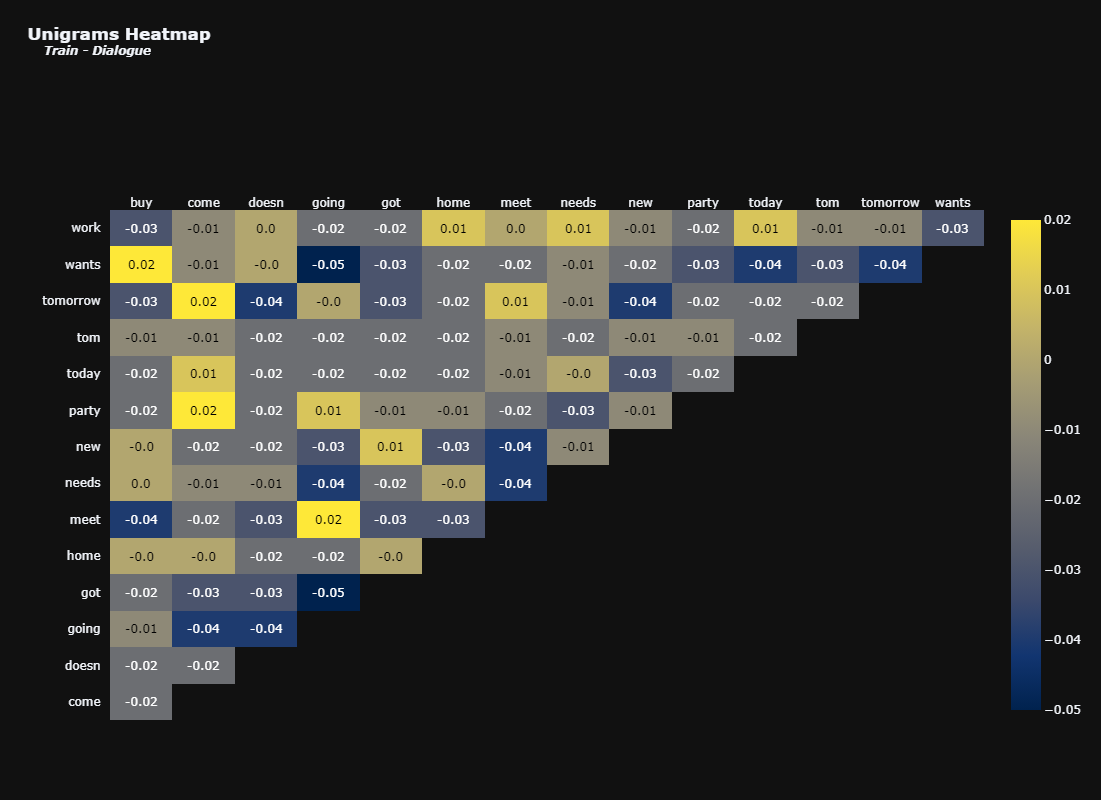

In [33]:
vectorizer = TfidfVectorizer(max_features = 15,stop_words = 'english') # Top 15 terms
x = vectorizer.fit_transform(train['summary'])
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidfvect, 'Unigrams', 'Train - Dialogue', 800, 800, 12)

## BIGRAM

In [34]:
vectorizer = TfidfVectorizer(max_features = 15,stop_words = 'english',ngram_range = (2,2)) # Top 15 terms
x = vectorizer.fit_transform(train['dialogue'].fillna(''))
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidfvect, 'Bigrams', 'Train - Dialogue', 800, 800, 12)

## TRIGRAM

In [35]:
vectorizer = TfidfVectorizer(max_features = 15,stop_words = 'english',ngram_range = (3,3)) # Top 15 terms
x = vectorizer.fit_transform(train['dialogue'].fillna(''))
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidfvect, 'Trigram', 'Train - Dialogue', 800, 800, 12)

* Similar patterns are seen in test and validation dataset

### Preprocessing Dataset

In [36]:
print(test['dialogue'].iloc[0])

Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye


In [37]:
import re

def clean_tags(text):
    # Step 1: Compile a regex pattern to match any text enclosed within angle brackets (HTML tags)
    clean = re.compile('<.*?>')  # This will match tags like <div>, <p>, <b>, etc.
    
    # Step 2: Remove the tags by replacing them with an empty string
    clean = re.sub(clean, '', text)  # Substitute all matches (HTML tags) with an empty string
    
    # Step 3: Split the text into lines and remove empty dialogue lines (lines ending with a colon and no text)
    # We split the text by newline, then filter out lines like 'Speaker:'
    clean = '\n'.join([line for line in clean.split('\n') if not re.match('.*:\s*$', line)])
    # The pattern '.*:\s*$' matches lines with any text ending in a colon (like 'Speaker:') and optional spaces
    
    # Step 4: Return the cleaned text with tags removed and empty dialogues filtered out
    return clean

# Example usage:
text = "<p>John: Hello there!</p>\n<p>Sarah:</p>\n<b>Mark: Hi!</b>"
cleaned_text = clean_tags(text)
print(cleaned_text)


John: Hello there!
Mark: Hi!


In [38]:
test2 = clean_tags(test['dialogue'].iloc[0]) # Applying function to example text
print(test2)

Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye


In [39]:
# Defining function to clean every text in the dataset.
def clean_df(df, cols):
    for col in cols:
        df[col] = df[col].fillna('').apply(clean_tags)
    return df

In [40]:
# Cleaning texts in all datasets
train = clean_df(train,['dialogue', 'summary'])
test = clean_df(test,['dialogue', 'summary'])
val = clean_df(val,['dialogue', 'summary'])

In [41]:
train.tail(3) # Visualizing results

,id,dialogue,summary
14729,13819050,"John: Every day some bad news. Japan will hunt whales again\r\nErica: Yes, I've read this. It's very upsetting\r\nJohn: Cruel Japanese\r\nFaith: I think this is a racist remark. Because Island and Norways has never joined this international whaling agreement\r\nErica: really? I haven't known, everybody is so outraged by Japan\r\nFaith: sure, European hypocrisy \r\nJohn: not entirely. Scandinavians don't use the nets that Japanese use, so Norway and Island kill much less specimens that Japan will\r\nFaith: oh, it's much more complex than one may expect\r\nJohn: True, but the truth is, that all of them should stop\r\nJohn: and this decision is a step back\r\nFaith: yes, this is worrying\r\nErica: And it seems that the most important whaling countries are out of the agreement right now\r\nFaith: yes, seems so\r\nJohn: Just like USA leaving the Paris Agreement",Japan is going to hunt whales again. Island and Norway never stopped hunting them. The Scandinavians kill fewer whales than the Japanese.
14730,13828395,"Jennifer: Dear Celia! How are you doing?\r\nJennifer: The afternoon with the Collins was very pleasant, nice folks, but we missed you.\r\nJennifer: But I appreciate your consideration for Peter.\r\nCelia: My dear Jenny! It turns out that my decision not to come, though I wanted so much to see you again and Peter and the Collins, was right. Yesterday it all developed into a full bore cold. Sh.....\r\nCelia: All symptoms like in a text book.\r\nCelia: Luckily it's contagious only on the first 2, 3 days, so when we meet next week it should be alright.\r\nCelia: Thanks for asking! Somehow for all of us Peter comes first now.\r\nJennifer: That's too bad. Poor you...\r\nJennifer: I'll be driving to FR, do you want me to bring you sth? It's on my way.\r\nCelia: Thank you dear! I was at the pharmacy yesterday and had done my shopping the day before.\r\nCelia: You'd better still stay away from me in case I'm still contagious\r\nJennifer: Right. So I'll only leave a basket on your terrace. A...","Celia couldn't make it to the afternoon with the Collins and Jennifer as she is ill. She's working, but doesn't want to meet with Jennifer as it might be contagious. Jennifer will leave a basket with cookies on Celia's terrace."
14731,13729017,"Georgia: are you ready for hotel hunting? We need to book something finally for Lisbon\r\nJuliette: sure we can go on, show me what you found\r\nJuliette: nah... it looks like an old lady's room lol\r\nJuliette: that's better... but the bed doesn't look very comfortable\r\nGeorgia: i kind of like it and it's really close to the city center\r\nJuliette: show me the others please\r\nJuliette: nah... this one sucks too, look at those horrible curtains \r\nGeorgia: aff Julie you are such a princess\r\nJuliette: i just want to be comfortable\r\nGeorgia: come on, stop whining you know we are on a budget\r\nJuliette: well hopefully we can find something that's decent right?\r\nGeorgia: i did show you decent but you want a Marriott or something :/\r\nJuliette: ok ok don't get angry\r\nGeorgia: we need to decide today, the longer we wait the higher the prices get \r\nJuliette: ok how about we get the second one then?\r\nGeorgia: ok give me a second\r\nJuliette: sure\r\nGeorgia: affff someon...","Georgia and Juliette are looking for a hotel in Lisbon. Juliette dislikes Georgia's choices. Juliette and Georgia decide on the second option presented by Georgia, but it has already been booked. Finally Georgia books the third hotel."


In [42]:
# Transforming dataframes into datasets
train_ds = Dataset.from_pandas(train)
test_ds = Dataset.from_pandas(test)
val_ds = Dataset.from_pandas(val)

# Visualizing results
print(train_ds)
print('\n' * 2)
print(test_ds)
print('\n' * 2)
print(val_ds)

Dataset({
    features: ['id', 'dialogue', 'summary', '__index_level_0__'],
    num_rows: 14731
})



Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 819
})



Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 818
})


### MOdeling

In [43]:
# Loading summarization pipeline with the bart-large-cnn model
summarizer = pipeline('summarization', model = 'facebook/bart-large-xsum')

In [44]:
news = '''Bobi, the world’s oldest dog ever, has died after reaching the almost inconceivable age of 31 years and 165 days, said Guinness World Records (GWR) on Monday.
His death at an animal hospital on Friday was initially announced by veterinarian Dr. Karen Becker.
She wrote on Facebook that “despite outliving every dog in history, his 11,478 days on earth would never be enough, for those who loved him.”
There were many secrets to Bobi’s extraordinary old age, his owner Leonel Costa told GWR in February. He always roamed freely, without a leash or chain, lived in a “calm, peaceful” environment and ate human food soaked in water to remove seasonings, Costa said.
He spent his whole life in Conqueiros, a small Portuguese village about 150 kilometers (93 miles) north of the capital Lisbon, often wandering around with cats.
Bobi was a purebred Rafeiro do Alentejo – a breed of livestock guardian dog – according to his owner. Rafeiro do Alentejos have a life expectancy of about 12-14 years, according to the American Kennel Club.
But Bobi lived more than twice as long as that life expectancy, surpassing an almost century-old record to become the oldest living dog and the oldest dog ever – a title which had previously been held by Australian cattle-dog Bluey, who was born in 1910 and lived to be 29 years and five months old.
However, Bobi’s story almost had a different ending.
When he and his three siblings were born in the family’s woodshed, Costa’s father decided they already had too many animals at home.
Costa and his brothers thought their parents had taken all the puppies away to be destroyed. However, a few sad days later, they found Bobi alive, safely hidden in a pile of logs.
The children hid the puppy from their parents and, by the time Bobi’s existence became known, he was too old to be put down and went on to live his record-breaking life.
His 31st birthday party in May was attended by more than 100 people and a performing dance troupe, GWR said.
His eyesight deteriorated and walking became harder as Bobi grew older but he still spent time in the backyard with the cats, rested more and napped by the fire.
“Bobi is special because looking at him is like remembering the people who were part of our family and unfortunately are no longer here, like my father, my brother, or my grandparents who have already left this world,” Costa told GWR in May. “Bobi represents those generations.”
'''
summarizer(news) # Using the pipeline to generate a summary of the text above


[{'summary_text': 'The world’s oldest dog has died, Guinness World Records has confirmed.'}]

In [45]:
checkpoint = 'facebook/bart-large-xsum' # Model
tokenizer = BartTokenizer.from_pretrained(checkpoint) # Loading Tokenizer

In [46]:
model = BartForConditionalGeneration.from_pretrained(checkpoint) # Loading Model

In [47]:
print(model) # Visualizing model's architecture

BartForConditionalGeneration(
  (model): BartModel(
    (shared): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
    

In [48]:
def preprocess_function(examples):
    inputs = [doc for doc in examples["dialogue"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["summary"], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [49]:
# Applying preprocess_function to the datasets
tokenized_train = train_ds.map(preprocess_function, batched=True,
                               remove_columns=['id', 'dialogue', 'summary', '__index_level_0__']) # Removing features

tokenized_test = test_ds.map(preprocess_function, batched=True,
                               remove_columns=['id', 'dialogue', 'summary']) # Removing features

tokenized_val = val_ds.map(preprocess_function, batched=True,
                               remove_columns=['id', 'dialogue', 'summary']) # Removing features

# Printing results
print('\n' * 3)
print('Preprocessed Training Dataset:\n')
print(tokenized_train)
print('\n' * 2)
print('Preprocessed Test Dataset:\n')
print(tokenized_test)
print('\n' * 2)
print('Preprocessed Validation Dataset:\n')
print(tokenized_val)

Map:   0%|          | 0/14731 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]





Preprocessed Training Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 14731
})



Preprocessed Test Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 819
})



Preprocessed Validation Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 818
})


In [50]:
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [51]:
from datasets import load_metric

# Load the rouge metric with trust_remote_code
metric = load_metric('rouge', trust_remote_code=True)


In [52]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred# Obtaining predictions and true labels
    
    # Decoding predictions
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    
    # Obtaining the true labels tokens, while eliminating any possible masked token (i.e., label = -100)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]
    
    
    # Computing rouge score
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()} # Extracting some results

    # Add mean-generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [53]:
!pip install git+https://github.com/huggingface/accelerate



Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/huggingface/accelerate to c:\users\adrit\appdata\local\temp\pip-req-build-gmt8uj20
  Resolved https://github.com/huggingface/accelerate to commit d5b7b70e06f30f4cd821a98bb1542ea0c403a65d
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate 'C:\Users\adrit\AppData\Local\Temp\pip-req-build-gmt8uj20'


In [54]:
from accelerate import Accelerator

accelerator = Accelerator()

# Now you can use it with your training loop


In [55]:
!pip show accelerate
!pip show transformers


Name: accelerate
Version: 0.35.0.dev0
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: C:\Users\adrit\AppData\Roaming\Python\Python312\site-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 
Name: transformers
Version: 4.44.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: C:\Users\adrit\AppData\Roaming\Python\Python312\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [56]:
training_args = Seq2SeqTrainingArguments(
    output_dir = 'bart_samsum',
    evaluation_strategy = "epoch",
    save_strategy = 'epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'eval_loss',
    seed = seed,
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=4,
    predict_with_generate=True,
    fp16=True,
    report_to="none"
)

In [57]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train() # Training model